In [2]:
import pickle
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import TensorDataset
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import plot_importance,plot_tree

In [3]:
df=pd.read_csv('with_title_embeddings.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,6,7,8,9,...,602,603,604,605,606,607,608,609,610,listen count
0,0,0,0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,...,0.051514,0.112377,-0.101461,-0.009572,0.013096,-0.002825,0.099568,-0.025742,0.019022,2
1,1,1,1,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,Stronger,Graduation,Kanye West,2007,...,0.033598,0.061161,-0.149784,0.123100,0.025756,0.042525,0.082381,0.098697,0.044474,1
2,2,2,2,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,Constellations,In Between Dreams,Jack Johnson,2005,...,-0.082567,0.082334,-0.025078,0.001777,-0.088783,-0.084012,0.079264,-0.034398,0.011239,1
3,3,3,3,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,...,-0.024937,0.020670,-0.038837,-0.064640,-0.012014,-0.012017,0.038513,0.001047,-0.035434,1
4,4,4,4,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOJPFQG12A58A7833A,Clarity,As/Is: Cleveland/Cincinnati_ OH - 8/03-8/04/04,John Mayer,0,...,-0.009999,0.110747,0.005159,-0.012548,-0.073592,0.056958,0.083830,-0.025329,0.052146,1


In [4]:
df.shape

(400000, 612)

In [5]:
df

,Unnamed: 0,0,1,2,3,4,6,7,8,9,...,602,603,604,605,606,607,608,609,610,listen count
0,0,0,0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,...,0.051514,0.112377,-0.101461,-0.009572,0.013096,-0.002825,0.099568,-0.025742,0.019022,2
1,1,1,1,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,Stronger,Graduation,Kanye West,2007,...,0.033598,0.061161,-0.149784,0.123100,0.025756,0.042525,0.082381,0.098697,0.044474,1
2,2,2,2,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,Constellations,In Between Dreams,Jack Johnson,2005,...,-0.082567,0.082334,-0.025078,0.001777,-0.088783,-0.084012,0.079264,-0.034398,0.011239,1
3,3,3,3,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,...,-0.024937,0.020670,-0.038837,-0.064640,-0.012014,-0.012017,0.038513,0.001047,-0.035434,1
4,4,4,4,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOJPFQG12A58A7833A,Clarity,As/Is: Cleveland/Cincinnati_ OH - 8/03-8/04/04,John Mayer,0,...,-0.009999,0.110747,0.005159,-0.012548,-0.073592,0.056958,0.083830,-0.025329,0.052146,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,399995,399995,399995,0,0b9df04f418efbd073138c38d23eedc1f8f8cf0b,SOLZEED12A6D4FA8C9,You Know I'm No Good,You Know I'm No Good - GFK Version,Amy Winehouse,2006,...,0.018743,-0.070078,-0.018737,0.013307,0.019532,0.030768,0.066467,-0.008994,-0.035382,1
399996,399996,399996,399996,0,0b9df04f418efbd073138c38d23eedc1f8f8cf0b,SOTPQFM12AB017AC9E,I'm Not A Loser,Somery,Descendents,1982,...,-0.030227,-0.035066,0.027614,0.012954,-0.000881,0.041341,0.049938,-0.009197,-0.014366,1
399997,399997,399997,399997,0,0b9df04f418efbd073138c38d23eedc1f8f8cf0b,SOUKJBT12A6701C4D6,Speed Of Sound,Speed Of Sound,Coldplay,2005,...,0.004395,0.084196,-0.029760,-0.030175,-0.036991,0.023476,0.068651,-0.057120,-0.057801,1
399998,399998,399998,399998,0,0b9df04f418efbd073138c38d23eedc1f8f8cf0b,SOVZCSJ12A8AE476EF,Another Time Another Place,Boy,U2,1994,...,0.005171,0.007614,-0.018521,-0.003246,-0.009801,-0.015022,0.041709,0.015949,0.004563,1


In [6]:
df_t=df.drop(['0','1','2','Unnamed: 0'],axis=1)

In [7]:
df_t

,3,4,6,7,8,9,10,11,12,13,...,602,603,604,605,606,607,608,609,610,listen count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,0.013271,-0.045020,-0.008184,0.049428,...,0.051514,0.112377,-0.101461,-0.009572,0.013096,-0.002825,0.099568,-0.025742,0.019022,2
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,Stronger,Graduation,Kanye West,2007,-0.016372,-0.012811,0.019531,0.062848,...,0.033598,0.061161,-0.149784,0.123100,0.025756,0.042525,0.082381,0.098697,0.044474,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,Constellations,In Between Dreams,Jack Johnson,2005,0.012538,-0.005735,0.014831,0.052208,...,-0.082567,0.082334,-0.025078,0.001777,-0.088783,-0.084012,0.079264,-0.034398,0.011239,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,0.006611,-0.003212,0.007064,0.051910,...,-0.024937,0.020670,-0.038837,-0.064640,-0.012014,-0.012017,0.038513,0.001047,-0.035434,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOJPFQG12A58A7833A,Clarity,As/Is: Cleveland/Cincinnati_ OH - 8/03-8/04/04,John Mayer,0,-0.007878,-0.010194,-0.004973,0.053964,...,-0.009999,0.110747,0.005159,-0.012548,-0.073592,0.056958,0.083830,-0.025329,0.052146,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0b9df04f418efbd073138c38d23eedc1f8f8cf0b,SOLZEED12A6D4FA8C9,You Know I'm No Good,You Know I'm No Good - GFK Version,Amy Winehouse,2006,0.004937,-0.009058,0.007886,0.045286,...,0.018743,-0.070078,-0.018737,0.013307,0.019532,0.030768,0.066467,-0.008994,-0.035382,1
399996,0b9df04f418efbd073138c38d23eedc1f8f8cf0b,SOTPQFM12AB017AC9E,I'm Not A Loser,Somery,Descendents,1982,0.005219,-0.019594,0.011422,0.055735,...,-0.030227,-0.035066,0.027614,0.012954,-0.000881,0.041341,0.049938,-0.009197,-0.014366,1
399997,0b9df04f418efbd073138c38d23eedc1f8f8cf0b,SOUKJBT12A6701C4D6,Speed Of Sound,Speed Of Sound,Coldplay,2005,0.002462,-0.002113,0.006928,0.051164,...,0.004395,0.084196,-0.029760,-0.030175,-0.036991,0.023476,0.068651,-0.057120,-0.057801,1
399998,0b9df04f418efbd073138c38d23eedc1f8f8cf0b,SOVZCSJ12A8AE476EF,Another Time Another Place,Boy,U2,1994,-0.016283,-0.002188,-0.007557,0.048147,...,0.005171,0.007614,-0.018521,-0.003246,-0.009801,-0.015022,0.041709,0.015949,0.004563,1


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df_t['3'])
df_t['user_id_encoded'] = label_encoder.transform(df_t['3'])


In [9]:
df_t

,3,4,6,7,8,9,10,11,12,13,...,603,604,605,606,607,608,609,610,listen count,user_id_encoded
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,0.013271,-0.045020,-0.008184,0.049428,...,0.112377,-0.101461,-0.009572,0.013096,-0.002825,0.099568,-0.025742,0.019022,2,36168
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,Stronger,Graduation,Kanye West,2007,-0.016372,-0.012811,0.019531,0.062848,...,0.061161,-0.149784,0.123100,0.025756,0.042525,0.082381,0.098697,0.044474,1,36168
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,Constellations,In Between Dreams,Jack Johnson,2005,0.012538,-0.005735,0.014831,0.052208,...,0.082334,-0.025078,0.001777,-0.088783,-0.084012,0.079264,-0.034398,0.011239,1,36168
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,0.006611,-0.003212,0.007064,0.051910,...,0.020670,-0.038837,-0.064640,-0.012014,-0.012017,0.038513,0.001047,-0.035434,1,36168
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOJPFQG12A58A7833A,Clarity,As/Is: Cleveland/Cincinnati_ OH - 8/03-8/04/04,John Mayer,0,-0.007878,-0.010194,-0.004973,0.053964,...,0.110747,0.005159,-0.012548,-0.073592,0.056958,0.083830,-0.025329,0.052146,1,36168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0b9df04f418efbd073138c38d23eedc1f8f8cf0b,SOLZEED12A6D4FA8C9,You Know I'm No Good,You Know I'm No Good - GFK Version,Amy Winehouse,2006,0.004937,-0.009058,0.007886,0.045286,...,-0.070078,-0.018737,0.013307,0.019532,0.030768,0.066467,-0.008994,-0.035382,1,2245
399996,0b9df04f418efbd073138c38d23eedc1f8f8cf0b,SOTPQFM12AB017AC9E,I'm Not A Loser,Somery,Descendents,1982,0.005219,-0.019594,0.011422,0.055735,...,-0.035066,0.027614,0.012954,-0.000881,0.041341,0.049938,-0.009197,-0.014366,1,2245
399997,0b9df04f418efbd073138c38d23eedc1f8f8cf0b,SOUKJBT12A6701C4D6,Speed Of Sound,Speed Of Sound,Coldplay,2005,0.002462,-0.002113,0.006928,0.051164,...,0.084196,-0.029760,-0.030175,-0.036991,0.023476,0.068651,-0.057120,-0.057801,1,2245
399998,0b9df04f418efbd073138c38d23eedc1f8f8cf0b,SOVZCSJ12A8AE476EF,Another Time Another Place,Boy,U2,1994,-0.016283,-0.002188,-0.007557,0.048147,...,0.007614,-0.018521,-0.003246,-0.009801,-0.015022,0.041709,0.015949,0.004563,1,2245


In [10]:
y = df_t['user_id_encoded']
df_t = df_t.drop(['user_id_encoded'], axis=1)
df_t['3'] = y

In [11]:
df_t

,3,4,6,7,8,9,10,11,12,13,...,602,603,604,605,606,607,608,609,610,listen count
0,36168,SOBBMDR12A8C13253B,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,0.013271,-0.045020,-0.008184,0.049428,...,0.051514,0.112377,-0.101461,-0.009572,0.013096,-0.002825,0.099568,-0.025742,0.019022,2
1,36168,SOBXHDL12A81C204C0,Stronger,Graduation,Kanye West,2007,-0.016372,-0.012811,0.019531,0.062848,...,0.033598,0.061161,-0.149784,0.123100,0.025756,0.042525,0.082381,0.098697,0.044474,1
2,36168,SOBYHAJ12A6701BF1D,Constellations,In Between Dreams,Jack Johnson,2005,0.012538,-0.005735,0.014831,0.052208,...,-0.082567,0.082334,-0.025078,0.001777,-0.088783,-0.084012,0.079264,-0.034398,0.011239,1
3,36168,SODACBL12A8C13C273,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,0.006611,-0.003212,0.007064,0.051910,...,-0.024937,0.020670,-0.038837,-0.064640,-0.012014,-0.012017,0.038513,0.001047,-0.035434,1
4,36168,SOJPFQG12A58A7833A,Clarity,As/Is: Cleveland/Cincinnati_ OH - 8/03-8/04/04,John Mayer,0,-0.007878,-0.010194,-0.004973,0.053964,...,-0.009999,0.110747,0.005159,-0.012548,-0.073592,0.056958,0.083830,-0.025329,0.052146,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,2245,SOLZEED12A6D4FA8C9,You Know I'm No Good,You Know I'm No Good - GFK Version,Amy Winehouse,2006,0.004937,-0.009058,0.007886,0.045286,...,0.018743,-0.070078,-0.018737,0.013307,0.019532,0.030768,0.066467,-0.008994,-0.035382,1
399996,2245,SOTPQFM12AB017AC9E,I'm Not A Loser,Somery,Descendents,1982,0.005219,-0.019594,0.011422,0.055735,...,-0.030227,-0.035066,0.027614,0.012954,-0.000881,0.041341,0.049938,-0.009197,-0.014366,1
399997,2245,SOUKJBT12A6701C4D6,Speed Of Sound,Speed Of Sound,Coldplay,2005,0.002462,-0.002113,0.006928,0.051164,...,0.004395,0.084196,-0.029760,-0.030175,-0.036991,0.023476,0.068651,-0.057120,-0.057801,1
399998,2245,SOVZCSJ12A8AE476EF,Another Time Another Place,Boy,U2,1994,-0.016283,-0.002188,-0.007557,0.048147,...,0.005171,0.007614,-0.018521,-0.003246,-0.009801,-0.015022,0.041709,0.015949,0.004563,1


In [12]:
df_f=df_t.drop(['4','6','7','8'],axis=1)
df_f=df_f.drop(['310'],axis=1)


In [13]:
df_f

,3,9,10,11,12,13,14,15,16,17,...,602,603,604,605,606,607,608,609,610,listen count
0,36168,1976,0.013271,-0.045020,-0.008184,0.049428,-0.025430,-0.008316,-0.042515,-0.007629,...,0.051514,0.112377,-0.101461,-0.009572,0.013096,-0.002825,0.099568,-0.025742,0.019022,2
1,36168,2007,-0.016372,-0.012811,0.019531,0.062848,-0.048744,-0.004653,0.018181,0.012372,...,0.033598,0.061161,-0.149784,0.123100,0.025756,0.042525,0.082381,0.098697,0.044474,1
2,36168,2005,0.012538,-0.005735,0.014831,0.052208,-0.050455,-0.028510,-0.014352,-0.001575,...,-0.082567,0.082334,-0.025078,0.001777,-0.088783,-0.084012,0.079264,-0.034398,0.011239,1
3,36168,1999,0.006611,-0.003212,0.007064,0.051910,-0.043352,-0.016626,-0.010534,0.005963,...,-0.024937,0.020670,-0.038837,-0.064640,-0.012014,-0.012017,0.038513,0.001047,-0.035434,1
4,36168,0,-0.007878,-0.010194,-0.004973,0.053964,-0.026041,0.001560,-0.028458,-0.002844,...,-0.009999,0.110747,0.005159,-0.012548,-0.073592,0.056958,0.083830,-0.025329,0.052146,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,2245,2006,0.004937,-0.009058,0.007886,0.045286,-0.042509,-0.012438,-0.016632,0.002289,...,0.018743,-0.070078,-0.018737,0.013307,0.019532,0.030768,0.066467,-0.008994,-0.035382,1
399996,2245,1982,0.005219,-0.019594,0.011422,0.055735,-0.054007,-0.013626,-0.000850,0.005102,...,-0.030227,-0.035066,0.027614,0.012954,-0.000881,0.041341,0.049938,-0.009197,-0.014366,1
399997,2245,2005,0.002462,-0.002113,0.006928,0.051164,-0.057308,-0.013618,-0.008647,-0.007001,...,0.004395,0.084196,-0.029760,-0.030175,-0.036991,0.023476,0.068651,-0.057120,-0.057801,1
399998,2245,1994,-0.016283,-0.002188,-0.007557,0.048147,-0.048819,0.001698,-0.006622,0.005799,...,0.005171,0.007614,-0.018521,-0.003246,-0.009801,-0.015022,0.041709,0.015949,0.004563,1


In [14]:
df_f = df_f.reset_index(drop=True)

In [15]:
X = df_f.iloc[:, :-1].values  
Y = df_f.iloc[:, -1].values

In [19]:
# mask = np.array([[type(item) == str for item in row] for row in X])

In [20]:
# X[mask] = 0

In [27]:
# mask.sum()

400000

In [59]:
df_f

,3,9,10,11,12,13,14,15,16,17,...,602,603,604,605,606,607,608,609,610,listen count
0,36168,1976,0.013271,-0.045020,-0.008184,0.049428,-0.025430,-0.008316,-0.042515,-0.007629,...,0.051514,0.112377,-0.101461,-0.009572,0.013096,-0.002825,0.099568,-0.025742,0.019022,2
1,36168,2007,-0.016372,-0.012811,0.019531,0.062848,-0.048744,-0.004653,0.018181,0.012372,...,0.033598,0.061161,-0.149784,0.123100,0.025756,0.042525,0.082381,0.098697,0.044474,1
2,36168,2005,0.012538,-0.005735,0.014831,0.052208,-0.050455,-0.028510,-0.014352,-0.001575,...,-0.082567,0.082334,-0.025078,0.001777,-0.088783,-0.084012,0.079264,-0.034398,0.011239,1
3,36168,1999,0.006611,-0.003212,0.007064,0.051910,-0.043352,-0.016626,-0.010534,0.005963,...,-0.024937,0.020670,-0.038837,-0.064640,-0.012014,-0.012017,0.038513,0.001047,-0.035434,1
4,36168,0,-0.007878,-0.010194,-0.004973,0.053964,-0.026041,0.001560,-0.028458,-0.002844,...,-0.009999,0.110747,0.005159,-0.012548,-0.073592,0.056958,0.083830,-0.025329,0.052146,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,2245,2006,0.004937,-0.009058,0.007886,0.045286,-0.042509,-0.012438,-0.016632,0.002289,...,0.018743,-0.070078,-0.018737,0.013307,0.019532,0.030768,0.066467,-0.008994,-0.035382,1
399996,2245,1982,0.005219,-0.019594,0.011422,0.055735,-0.054007,-0.013626,-0.000850,0.005102,...,-0.030227,-0.035066,0.027614,0.012954,-0.000881,0.041341,0.049938,-0.009197,-0.014366,1
399997,2245,2005,0.002462,-0.002113,0.006928,0.051164,-0.057308,-0.013618,-0.008647,-0.007001,...,0.004395,0.084196,-0.029760,-0.030175,-0.036991,0.023476,0.068651,-0.057120,-0.057801,1
399998,2245,1994,-0.016283,-0.002188,-0.007557,0.048147,-0.048819,0.001698,-0.006622,0.005799,...,0.005171,0.007614,-0.018521,-0.003246,-0.009801,-0.015022,0.041709,0.015949,0.004563,1


In [42]:
for i in df_f.columns.values.tolist():
  x = df_f[i]
  for j in x:
    if type(j) == float:
      break
    else:
      print(i)
      break

3
9
310
listen count


In [44]:
yy=df_f[['3','9','310','listen count']]
yy.to_csv("hh.csv")

In [16]:
X=X.astype(float)
Y=Y.astype(float)

In [17]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Train set: X={}, Y={}".format(X_train.shape, Y_train.shape))
print("Test set: X={}, Y={}".format(X_test.shape, Y_test.shape))

Train set: X=(320000, 602), Y=(320000,)
Test set: X=(80000, 602), Y=(80000,)


In [62]:
X

array([[ 3.6168000e+04,  1.9760000e+03,  1.3270612e-02, ...,
         9.9568100e-02, -2.5741618e-02,  1.9021680e-02],
       [ 3.6168000e+04,  2.0070000e+03, -1.6372250e-02, ...,
         8.2380760e-02,  9.8696870e-02,  4.4473894e-02],
       [ 3.6168000e+04,  2.0050000e+03,  1.2537771e-02, ...,
         7.9263870e-02, -3.4397632e-02,  1.1238636e-02],
       ...,
       [ 2.2450000e+03,  2.0050000e+03,  2.4615424e-03, ...,
         6.8650560e-02, -5.7119830e-02, -5.7801068e-02],
       [ 2.2450000e+03,  1.9940000e+03, -1.6282710e-02, ...,
         4.1708900e-02,  1.5948752e-02,  4.5625600e-03],
       [ 2.2450000e+03,  2.0050000e+03, -3.3413712e-03, ...,
         4.9943980e-02,  2.1052160e-02, -3.4209530e-02]])

In [34]:
Y

array([2., 1., 1., ..., 1., 1., 1.])

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report

## Linear Regression

In [25]:
X_train

array([[ 2.83550000e+04,  1.97400000e+03,  6.07275800e-03, ...,
         8.62449400e-02,  9.96945600e-02, -7.35159100e-02],
       [ 2.52350000e+04,  2.01000000e+03, -1.41466880e-04, ...,
         4.57403440e-02, -4.59965400e-03, -7.83485300e-05],
       [ 5.55000000e+03,  2.00700000e+03, -3.31609530e-03, ...,
         1.16547935e-01,  2.88908840e-02, -3.18106000e-03],
       ...,
       [ 1.86260000e+04,  2.00200000e+03,  2.12478680e-03, ...,
         8.73927500e-02,  1.53169315e-02,  3.91513400e-03],
       [ 4.24080000e+04,  2.00700000e+03, -5.85372050e-03, ...,
         2.01053730e-02,  3.97513360e-02, -9.46702700e-03],
       [ 1.85200000e+04,  2.00500000e+03, -6.62322100e-03, ...,
         6.27683000e-02, -3.62141700e-02,  3.31468360e-02]])

In [64]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [65]:
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Mean squared error: 35.66
R-squared: 0.02


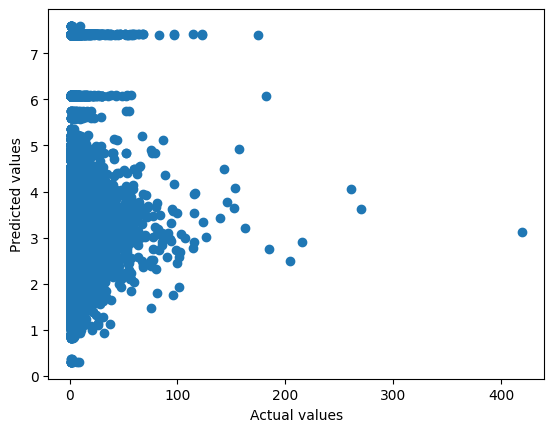

In [66]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

## Xgboost

In [ ]:
import xgboost as xgb


In [67]:
xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train, Y_train)

Y_pred = xgb_model.predict(X_test)

In [70]:
Y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Mean squared error: 36.61
R-squared: -0.01


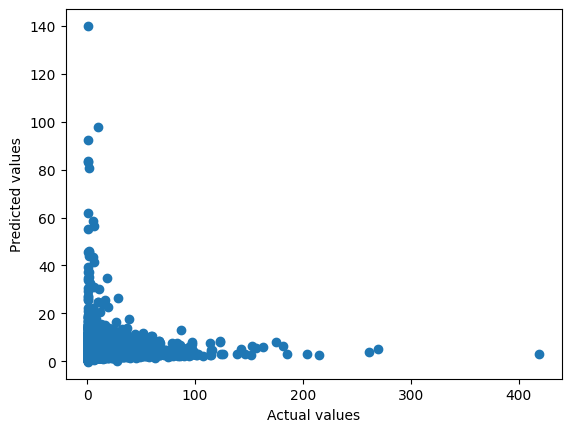

In [71]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

## SVR

In [19]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, Y_train)



In [ ]:
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

In [ ]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

## Deep learning based model

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [28]:
model = Sequential()
model.add(Dense(256, input_dim=602, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

Epoch 1/20
10000/10000 [==============================] - 15s 1ms/step - loss: 37.6606 - val_loss: 36.2097
Epoch 2/20
10000/10000 [==============================] - 15s 2ms/step - loss: 37.0179 - val_loss: 36.2577
Epoch 3/20
10000/10000 [==============================] - 64s 6ms/step - loss: 36.9680 - val_loss: 36.2098
Epoch 4/20
10000/10000 [==============================] - 24s 2ms/step - loss: 36.9541 - val_loss: 36.2201
Epoch 5/20
10000/10000 [==============================] - 19s 2ms/step - loss: 36.9518 - val_loss: 36.2066
Epoch 6/20
10000/10000 [==============================] - 24s 2ms/step - loss: 36.9445 - val_loss: 36.2176
Epoch 7/20
10000/10000 [==============================] - 26s 3ms/step - loss: 36.9446 - val_loss: 36.2094
Epoch 8/20
10000/10000 [==============================] - 25s 2ms/step - loss: 36.9429 - val_loss: 36.2066
Epoch 9/20
10000/10000 [==============================] - 25s 3ms/step - loss: 36.9428 - val_loss: 36.2055
Epoch 10/20
10000/10000 [============

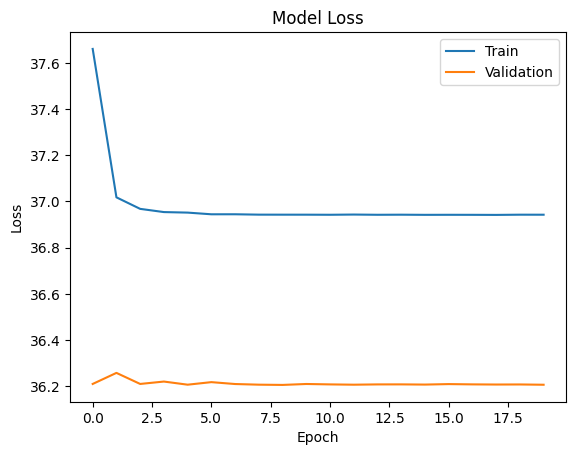

2500/2500 [==============================] - 2s 865us/step


In [29]:
model.compile(loss='mse', optimizer='adam')

# Train the model on the training data for 100 epochs
# model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Use the model to make predictions on the testing data
Y_pred = model.predict(X_test)

In [30]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Mean squared error: 36.21
R-squared: 0.00


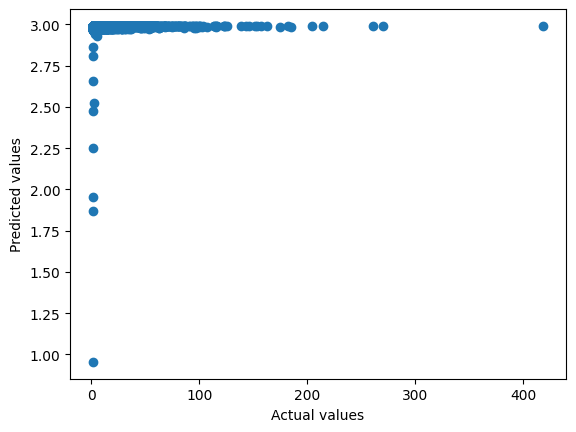

In [31]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()